In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
with np.load("../data/mnist.npz") as data:
    x_train_raw, y_train = data["x_train"], data["y_train"]
    x_test_raw, y_test = data["x_test"], data["y_test"]

# Load model
from tensorflow.keras.models import load_model
model = load_model("../models/mnist_model.h5")

In [2]:
# Load dataset
with np.load("../data/mnist.npz") as data:
    x_train_raw, y_train = data["x_train"], data["y_train"]
    x_test_raw, y_test = data["x_test"], data["y_test"]

# Preprocess for training
x_train = x_train_raw.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test_raw.reshape(-1, 784).astype("float32") / 255.0

# Build Mode
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

c:\Users\Sazgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


این قسمت را اجرا نکنید 
 اگر مایل به یادگیری دوباره مدل هستید این قسمت را اجرا کنید

In [ ]:
# Train
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluat
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", acc)

# Save model
model.save("../models/mnist_model.h5")

In [3]:
# Load model
model = load_model("../models/mnist_model.h5")

def predict_images(model, images):
    if images.ndim == 2:
        images = np.expand_dims(images, 0)

    imgs = images.reshape(-1, 784).astype("float32") / 255.0
    preds = model.predict(imgs)

    for img, pred in zip(images, preds):
        plt.imshow(img, cmap="gray")
        plt.title(f"Predicted: {np.argmax(pred)}")
        plt.axis("off")
        plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


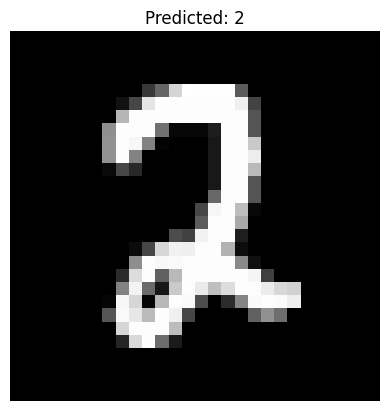

In [4]:
# Test with random sampl
sample_image = x_train_raw[np.random.randint(0, 60000)]
predict_images(model, sample_image)